# Problem Statement Understanding 

**The given situation pertains to a business problem being faced by BoomBikes.**

The company has witnessed considerble dip in revenues during Covid-19 induced lockdowns and suffered heavy losses and company is struggling to survive.

The company wants to create a robust business plan and has roped in a consulting company to help it to understand the demand patterns of bikes sharing ones the lockdown opens. Specifically, they wish to understand the factors on which the demand of these bikes depends.

In nutshell, Deliverable by the consulting firm are:

    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those varibales describes the bike demands.

# Import all required libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#pd.set_option('display.float_format', lambda x: '%.5' % x)

# Loading and Basic understanding of the dataset:

In [3]:
#Loading:

boombikes = pd.read_csv("day.csv")
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Basic understanding of datasets:

print(f'Given dataset contains {boombikes.shape[0]} rows and {boombikes.shape[1]} columns.')

Given dataset contains 730 rows and 16 columns.


In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observations:**
    
Dataset contains 15 columns and 730 rows.


Dataset does not have null values. Hence, null value handling will not be done as part of this assignment.

In [6]:
# Checking for duplicate values:

len(boombikes[boombikes.duplicated()])

0

There is no duplicate value found

In [7]:
# unique values:

boombikes.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# Feature Understanding:

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)



**Droping features based on above shared logic:**

In [8]:
# Creating variable to store list of feature names to be droped:

drop_col = ['instant','dteday']

# Creating a loop to drop the columns:

for i in boombikes.columns:
    if i in drop_col:
        boombikes.drop(labels = i, axis = 1, inplace = True)
        
# Inspecting dataframe:

boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Basic Propriety Assesment:

boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Transforming season, weathersit, mnth and weekday columns based on above logic:**

In [10]:
# Transforming weathersit features:

boombikes['weathersit'] = boombikes['weathersit'].map({1:'Clear to Partly Cloudy', 2:'Mist and Cloudy',
                                                       3:'Light Rain or Snow', 4:'Heavy Rain or Snow'})

# Transforming season features:

boombikes['season'] = boombikes['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


# Transforming Month features:

boombikes['mnth'] = boombikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                          7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


# Transforming Weekday features:

boombikes['weekday'] = boombikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5: 'Fri', 6:'Sat'})




# Re- Observing the dataset:

boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis

**Univariate Analysis**

Target Variable

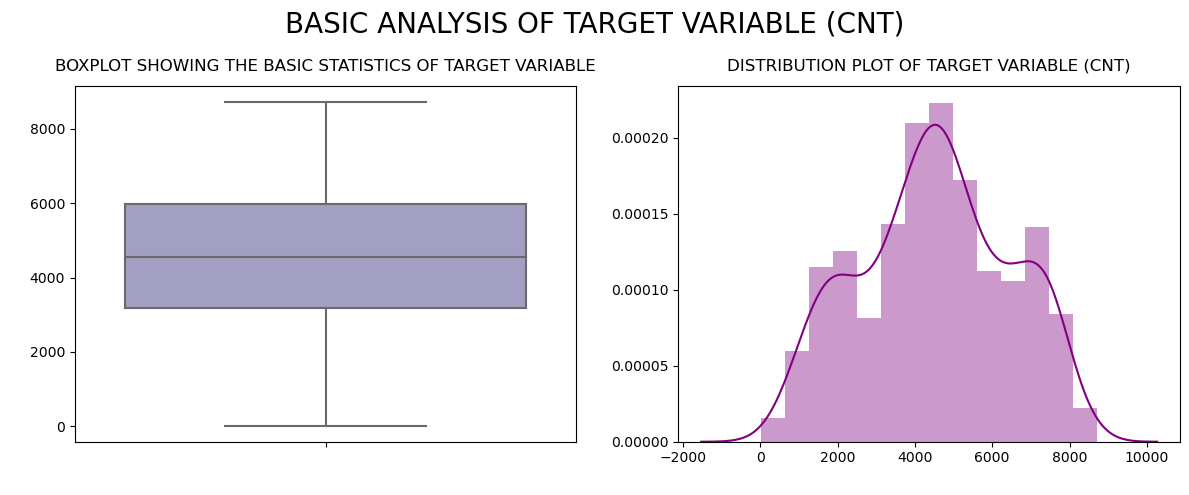

In [11]:
# Creating subplot grid:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))


# Creating main title:

fig.suptitle('basic analysis of target variable (cnt)'.upper(), fontsize = 20)


# Populating plot1:

sns.boxplot(y = boombikes['cnt'], ax = ax[0], palette = 'Purples')
ax[0].set_title('boxplot showing the basic statistics of target variable'.upper(),
               fontsize = 12, fontweight = 20, y = 1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')


# Populating plot2:

sns.distplot( boombikes['cnt'], ax = ax[1], color = 'purple')
ax[1].set_title('distribution plot of target variable (cnt)'.upper(),
               fontsize = 12, fontweight = 20, y = 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')


# Setting aesthetics

plt.tight_layout()
plt.show()

**Continuous Independent Variable**

In [12]:
# Creating a list of continuous independent variables for analysis:

cont_var = [ i for i in boombikes.select_dtypes(exclude = 'object').columns if boombikes[i].nunique() > 2 and i != 'cnt']

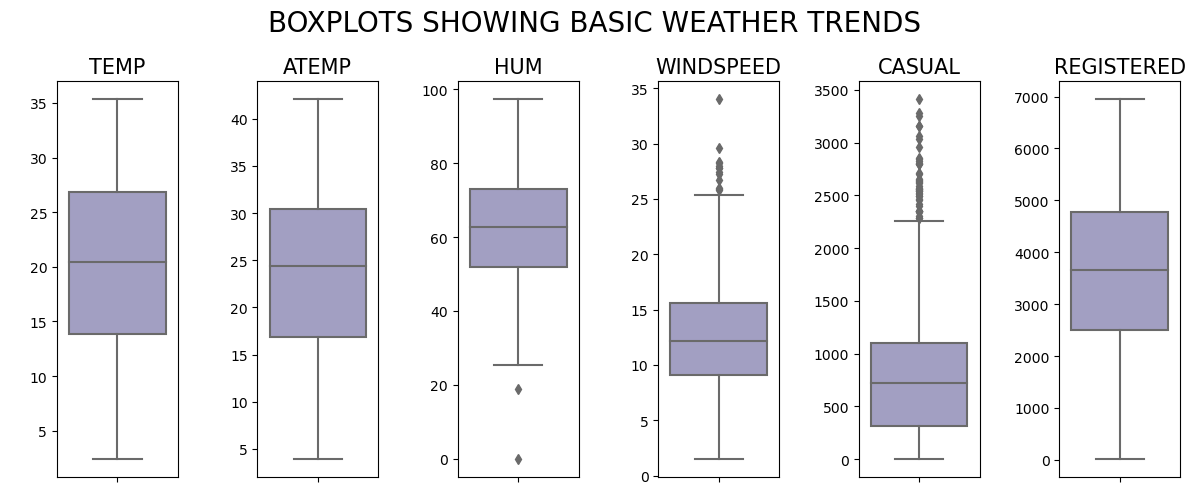

In [13]:
# Creating a subplot grid:

fig, ax = plt.subplots(nrows = 1, ncols = len(cont_var), figsize = (12,5))


# Placing main title:

fig.suptitle('boxplots showing basic weather trends'.upper(), fontsize = 20)


# Looping to fill subplot grid with plots:

for i in range(len(cont_var)):
    
    sns.boxplot(y=boombikes[cont_var[i]], ax = ax[i], palette = 'Purples')
    
    # Setting aesthetics and readability:
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize = 15)
    ax[i].set_ylabel(' ')
    
# Setting aesthetics

plt.tight_layout()
plt.show()

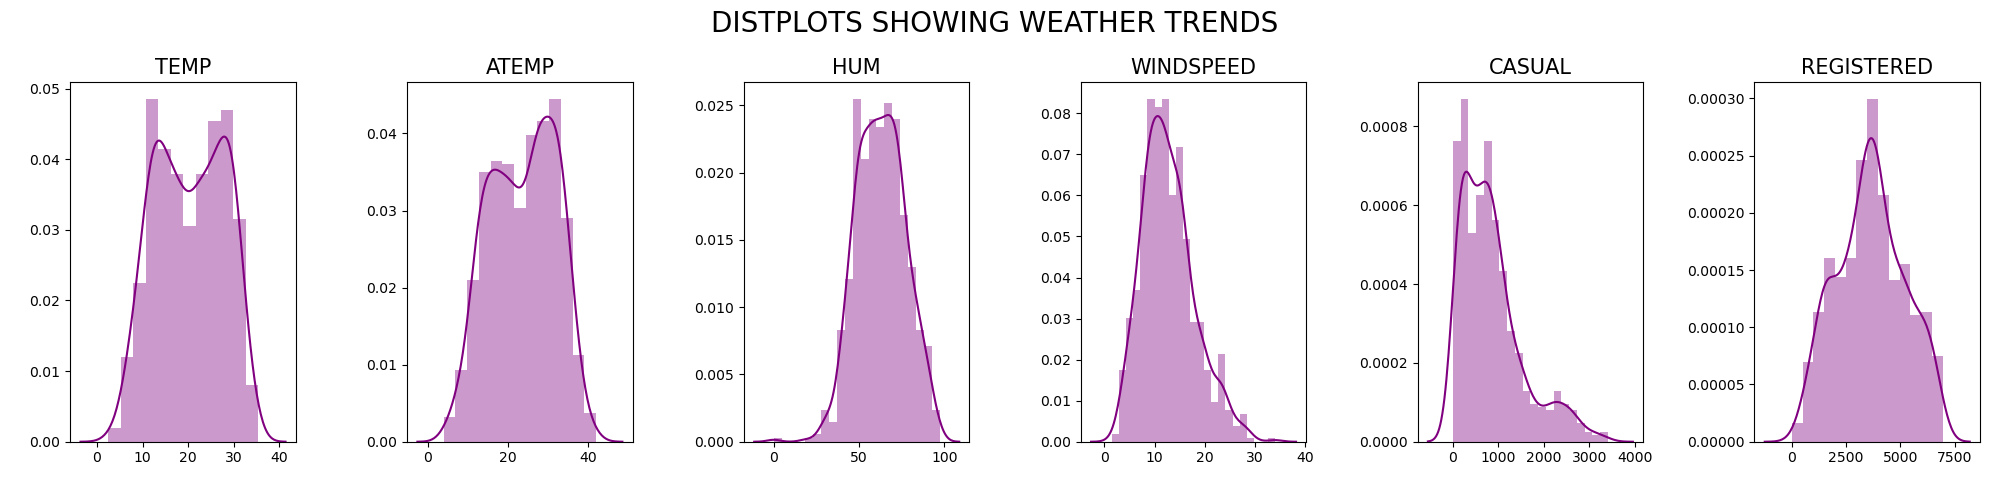

In [14]:
# Creating a subplot grid:

fig, ax = plt.subplots(nrows = 1, ncols = len(cont_var), figsize = (20, 5))


# Placing main title:

plt.suptitle( 'distplots showing weather trends'.upper(), fontsize = 20)
             
            
# Looping to subplot grid with plots:

for i in range(len(cont_var)):
    
    sns.distplot(boombikes[cont_var[i]], ax = ax[i], color = 'purple')
    
    # Setting aesthetics and readability:
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize = 15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
    

# Setting final aesthetics
plt.tight_layout()
plt.show()

# Preprocessing the dataset

In [15]:
df = pd.read_csv('day.csv') 
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [16]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [18]:
# change int columns to category
cols = ['season','month','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   month       730 non-null    category
 2   holiday     730 non-null    category
 3   weekday     730 non-null    category
 4   workingday  730 non-null    category
 5   weather     730 non-null    category
 6   temp        730 non-null    float64 
 7   atemp       730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  casual      730 non-null    int64   
 11  registered  730 non-null    int64   
 12  count       730 non-null    int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 45.6 KB


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

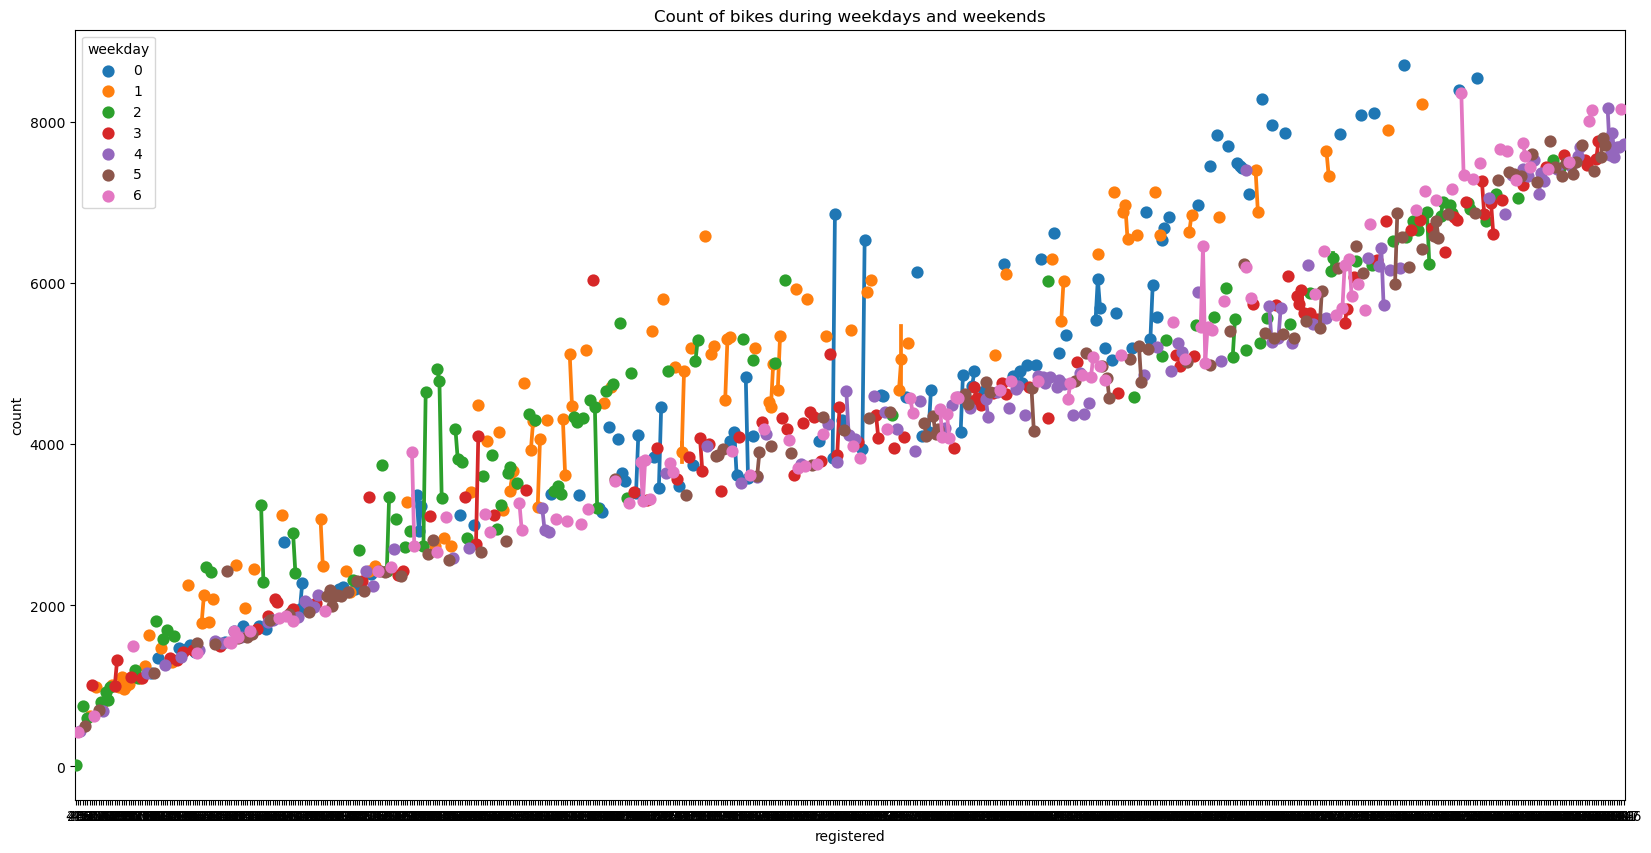

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='registered', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

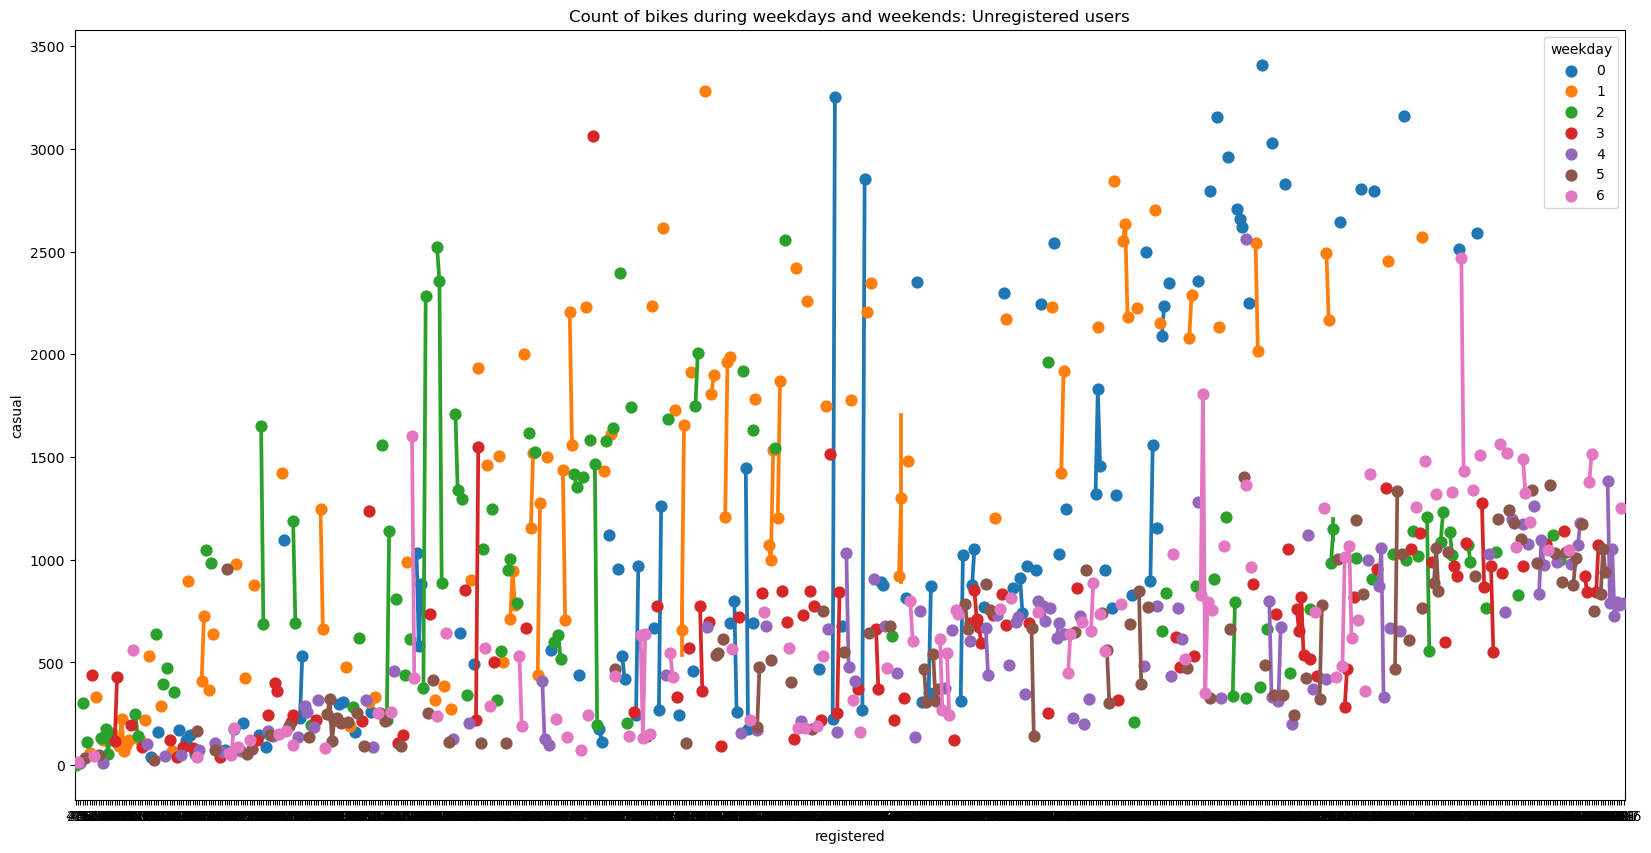

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='registered', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

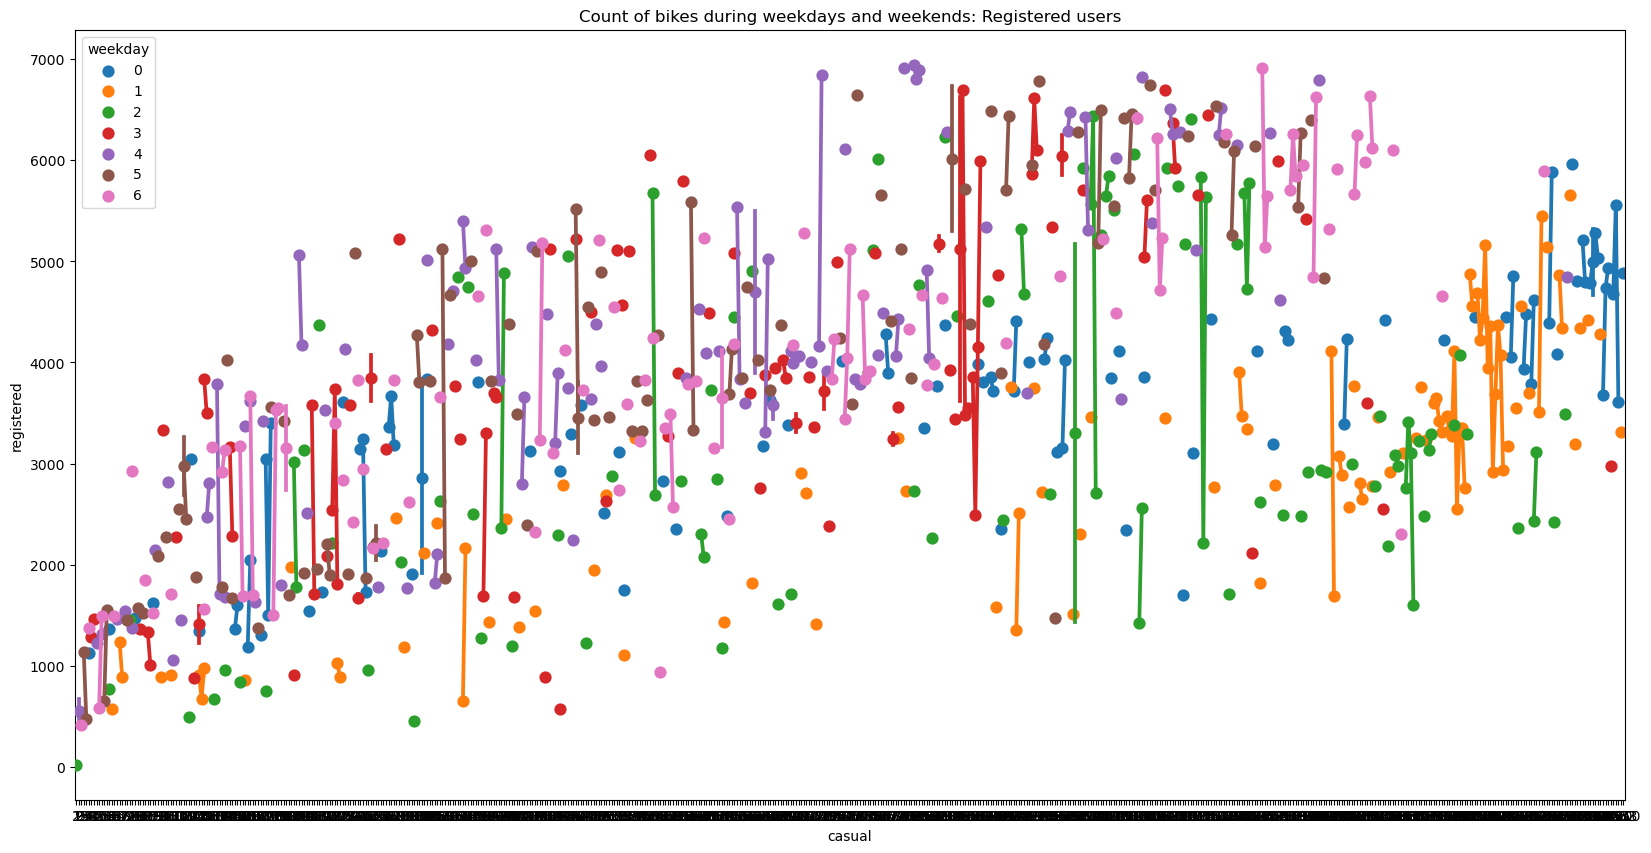

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='casual', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different months')]

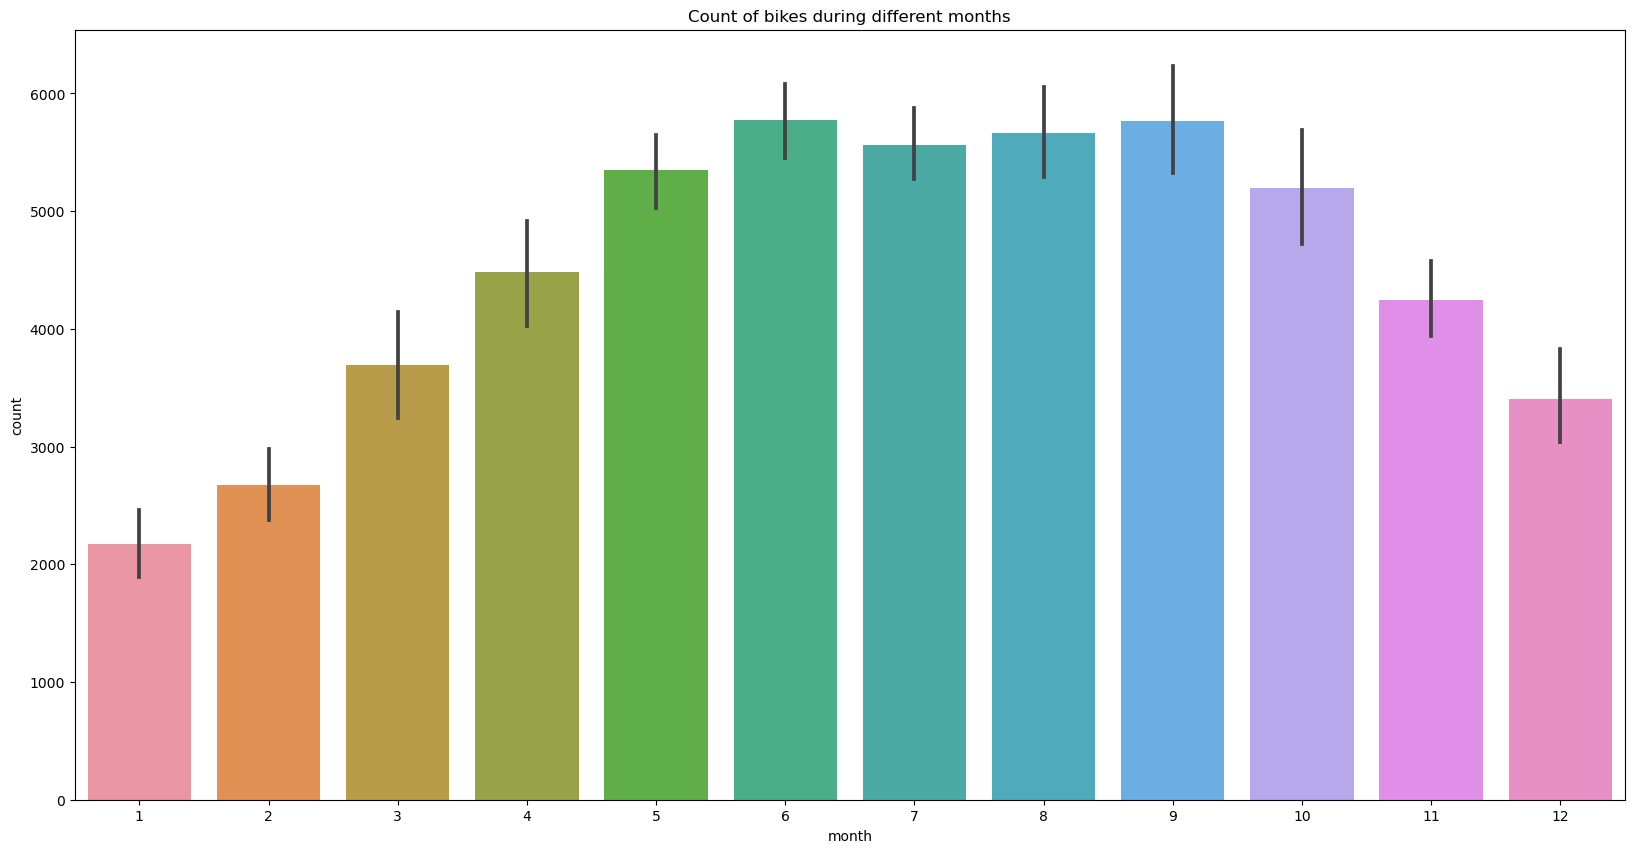

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

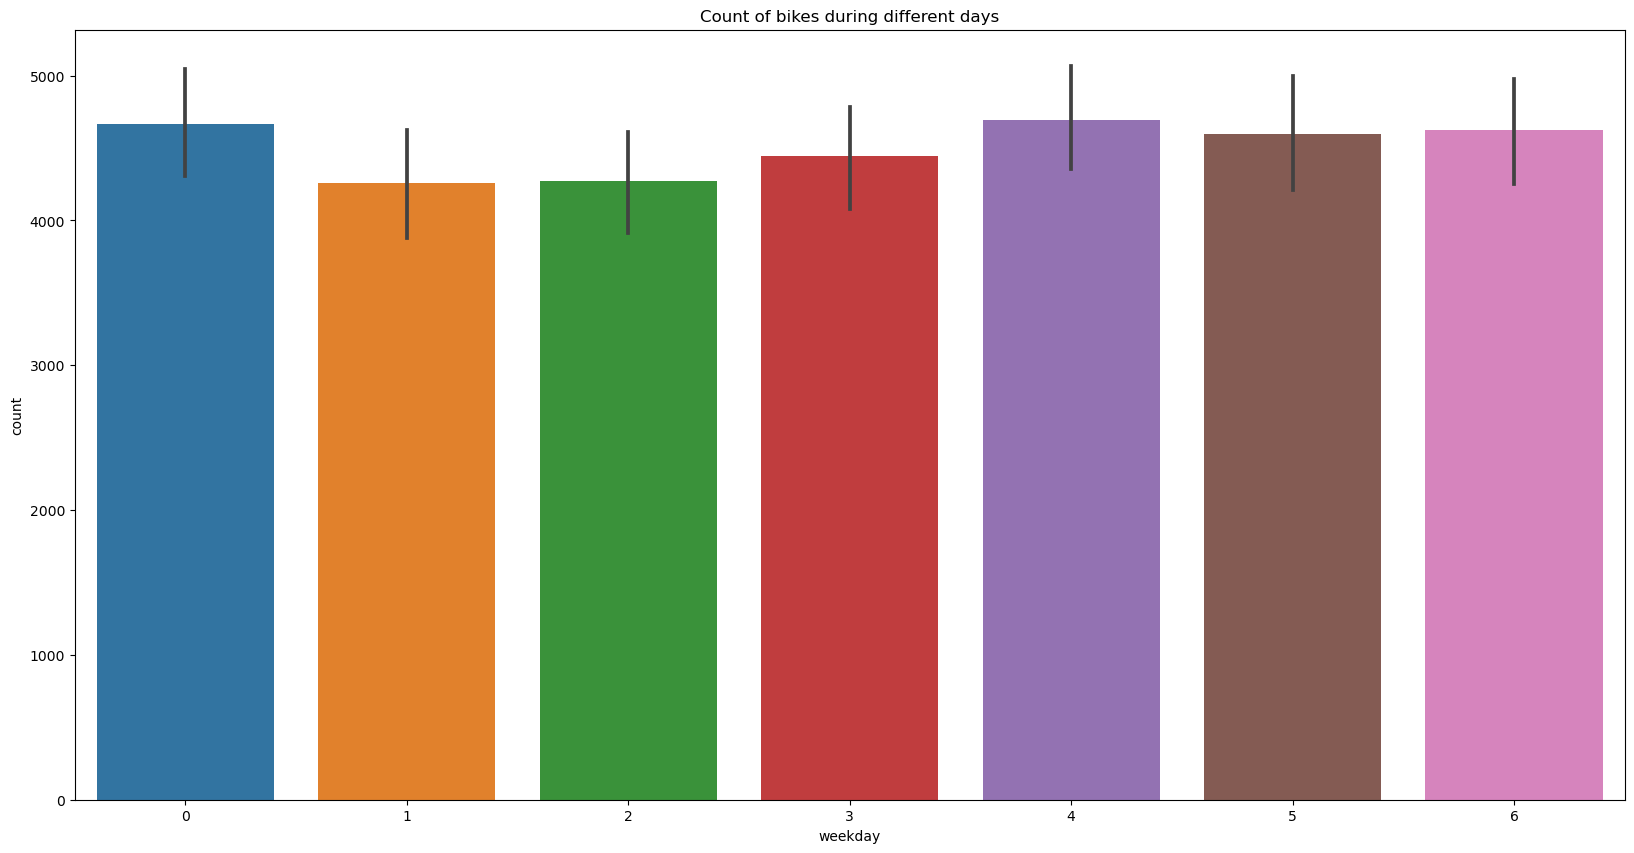

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

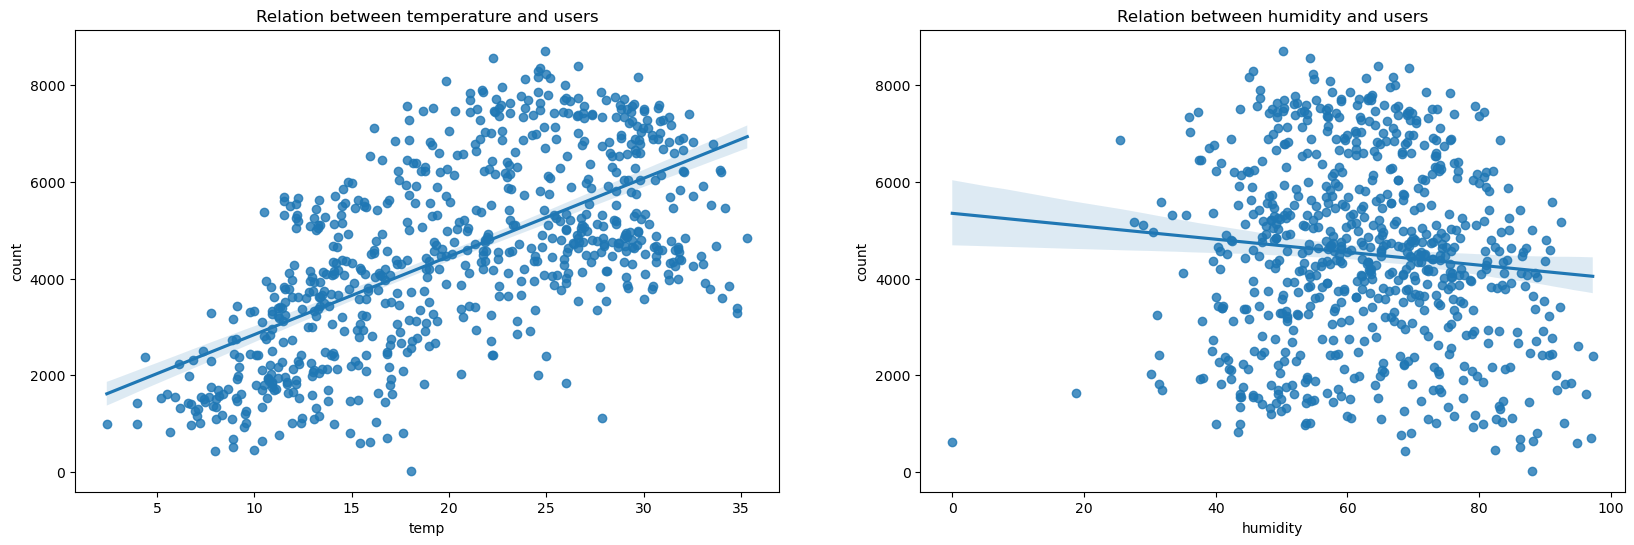

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

[Text(0.5, 1.0, 'Theoritical quantiles')]

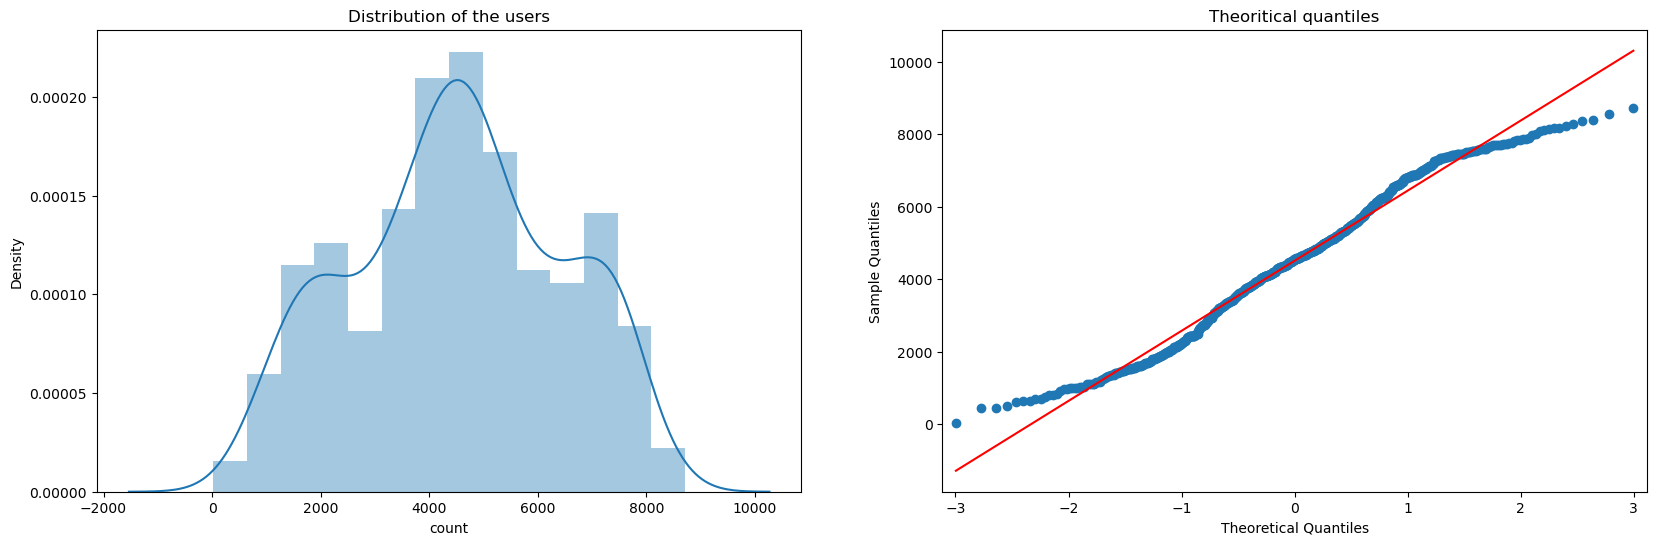

In [25]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [26]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

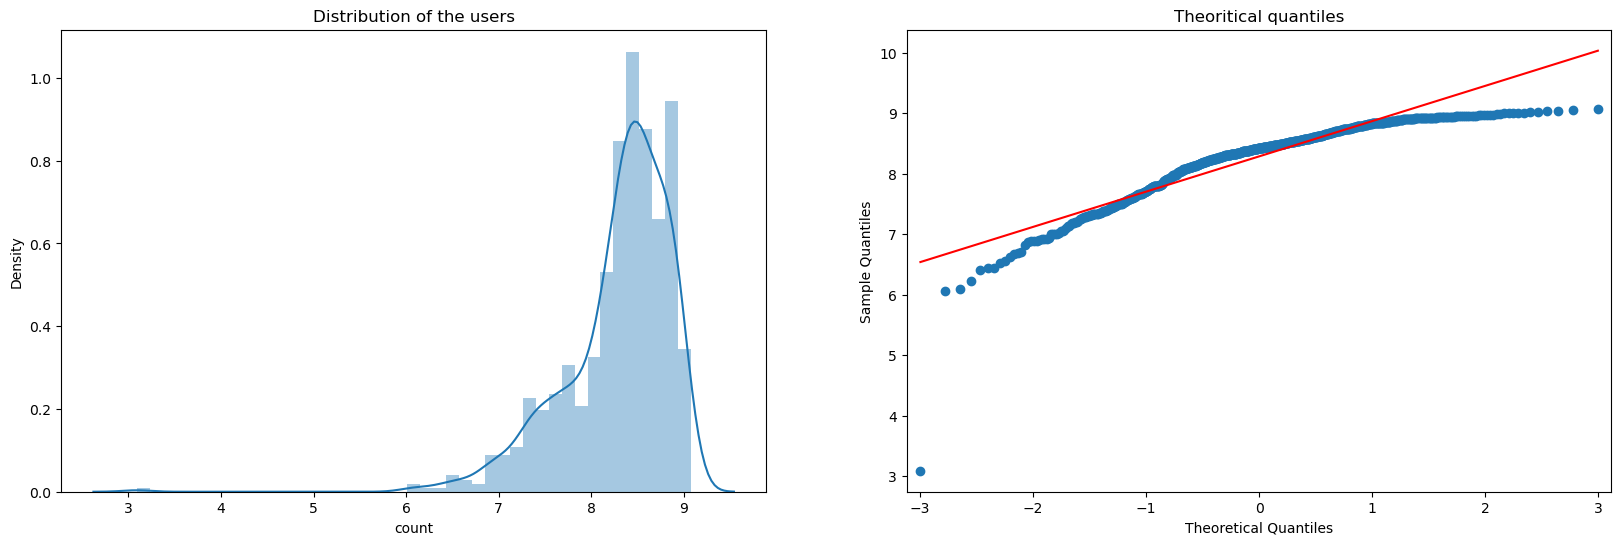

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

**Corelation Matrix**

<AxesSubplot:>

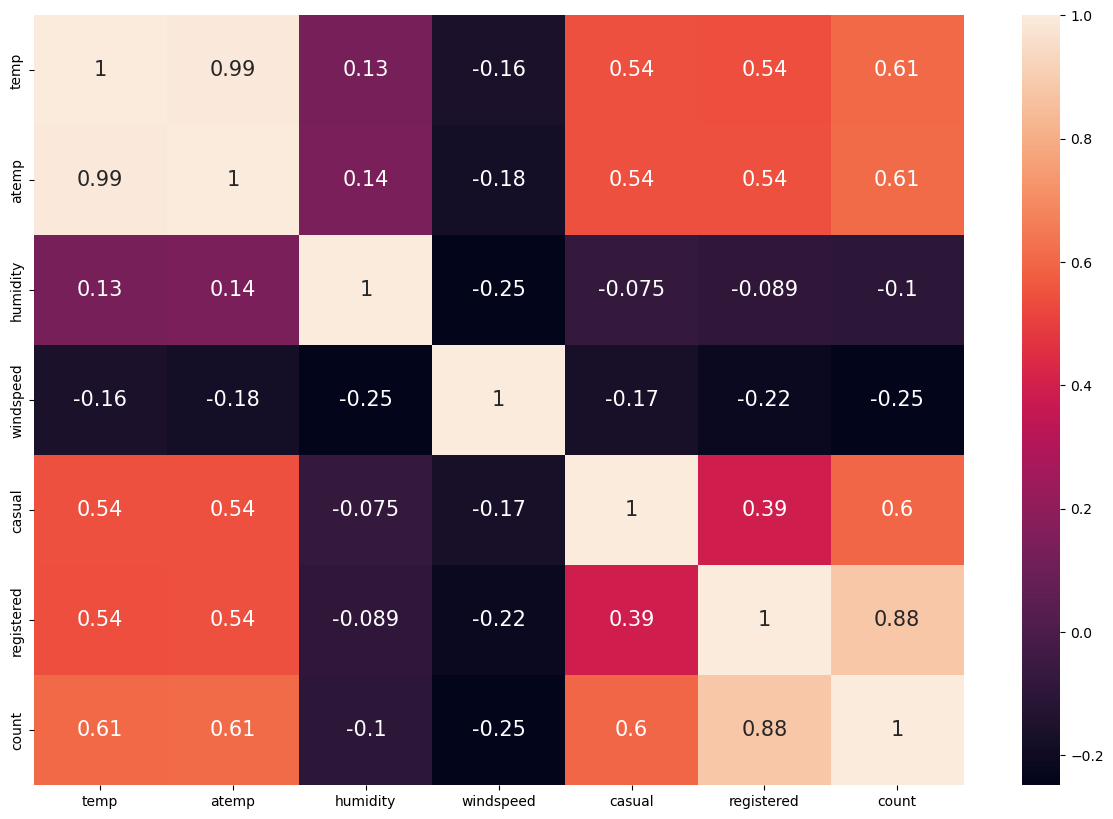

In [28]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

**One hot Encoding**

In [29]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [30]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,14.110847,18.18125,80.5833,10.749882,331,654,6.892642,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,6.685861,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,7.207119,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,7.353722,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,7.377759,0,0,0,...,0,0,0,0,0,1,0,1,0,0


**Input Split**

In [31]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

**Model Training**

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]


In [33]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5,shuffle = True, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [34]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.15273691464210426
Model: Ridge()
CV score: 0.15165786884381188
Model: HuberRegressor()
CV score: 0.1726332468789387
Model: ElasticNetCV()
CV score: 0.1854520658011187
Model: DecisionTreeRegressor()
CV score: 0.2659483226224329
Model: RandomForestRegressor()
CV score: 0.14800772794502776
Model: ExtraTreesRegressor()
CV score: 0.15156683484430863
Model: GradientBoostingRegressor()
CV score: 0.1462332234884732


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

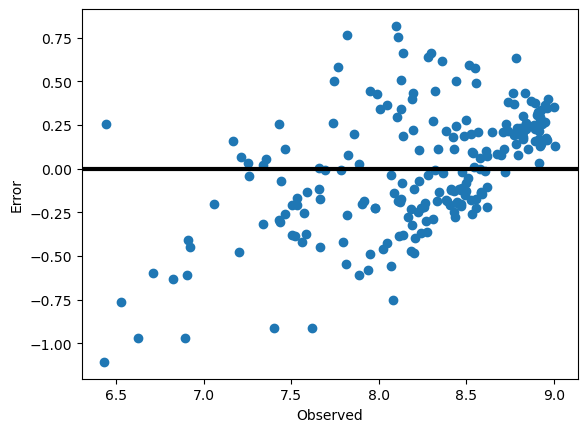

In [37]:
# plot the error difference:

error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.3454739107835827

In [40]:
# Create and train the model with the scaled data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.6081016114202996

In [43]:
# Evaluate the model on the training set
train_score = lr.score(x_train, y_train)
print("Training Score:", train_score)

# Evaluate the model on the testing set
test_score = lr.score(x_test, y_test)
print("Testing Score:", test_score)

Training Score: 0.5829440188755417
Testing Score: 0.6081016114202996


In [45]:
from sklearn.metrics import r2_score

y_pred=lr.predict(x_test)
f'R2_Score:{r2_score(y_test,y_pred)}'

'R2_Score:0.6081016114202996'

In [46]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_pred)

print("MSE:",mse)

f'RMSE: {math.sqrt(mse)}'

MSE: 0.12905906647272702


'RMSE: 0.35924791784048943'

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)

cross_val_score(LinearRegression(), X, y, cv=cv)
     

array([0.56386898, 0.51838881, 0.53837869, 0.6355192 , 0.6137033 ])

In [48]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.573972,{}
1,lasso,0.317374,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.341153,"{'criterion': 'mse', 'splitter': 'best'}"
